In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X ,y = make_blobs(n_samples=1000,n_features=2,centers=10,random_state=42)

In [6]:
X.shape

(1000, 2)

In [7]:
y.shape

(1000,)

In [9]:
X

array([[-1.61989569, -2.57677003],
       [-3.70050112,  9.67083974],
       [-5.33943813, -5.73938285],
       ...,
       [-9.76138194,  9.41377609],
       [-6.30307023, -6.56885944],
       [-5.6411193 , -6.70474296]])

In [10]:
y

array([9, 0, 7, 1, 9, 7, 8, 6, 3, 7, 4, 8, 4, 2, 2, 7, 8, 1, 7, 9, 1, 4,
       7, 5, 8, 5, 7, 2, 5, 6, 7, 1, 6, 8, 3, 6, 1, 2, 8, 9, 1, 9, 5, 2,
       9, 5, 6, 5, 0, 1, 2, 7, 0, 3, 3, 0, 5, 6, 9, 5, 7, 4, 6, 8, 4, 5,
       9, 2, 5, 4, 8, 8, 0, 2, 7, 1, 3, 3, 3, 6, 3, 4, 7, 4, 0, 3, 6, 4,
       4, 0, 0, 4, 9, 2, 1, 1, 4, 9, 3, 1, 1, 3, 6, 1, 4, 0, 3, 4, 7, 4,
       6, 1, 3, 4, 9, 0, 2, 2, 6, 9, 8, 2, 2, 2, 0, 8, 1, 6, 4, 0, 9, 4,
       3, 6, 0, 1, 1, 3, 4, 4, 6, 8, 6, 7, 7, 7, 4, 9, 8, 2, 1, 5, 4, 4,
       3, 2, 0, 6, 6, 5, 4, 2, 6, 5, 6, 7, 2, 0, 8, 2, 0, 9, 8, 2, 5, 7,
       1, 2, 2, 7, 6, 5, 1, 2, 5, 1, 1, 0, 8, 7, 8, 5, 6, 5, 7, 2, 7, 0,
       9, 4, 9, 6, 3, 7, 8, 2, 0, 2, 8, 0, 2, 4, 3, 1, 4, 3, 1, 7, 3, 8,
       7, 3, 5, 2, 6, 9, 1, 4, 3, 0, 3, 9, 5, 8, 8, 6, 5, 6, 7, 5, 6, 1,
       5, 2, 1, 9, 9, 0, 3, 2, 1, 2, 1, 7, 6, 7, 1, 0, 2, 6, 8, 2, 5, 7,
       3, 7, 6, 8, 4, 9, 1, 3, 2, 2, 7, 9, 2, 7, 4, 7, 6, 4, 3, 3, 2, 7,
       5, 1, 8, 6, 0, 7, 3, 3, 5, 4, 9, 8, 5, 5, 5,

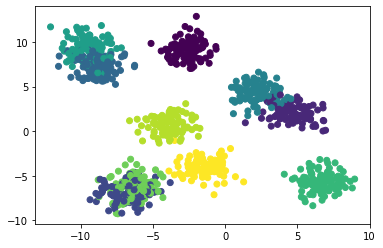

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)

In [18]:
def eucledian_distace(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [19]:
eucledian_distace(X[0],X[1])

12.423077873391719

In [82]:
class KNN:
    
    def __init__(self,k):
        self.k = k
        self.X = None
        self.y = None
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self,point):
        dis = []
        for X , y in zip(self.X,self.y):
            d = eucledian_distace(X,point)
            dis.append((d,y))
            dis = sorted(dis)
            top = dis[:self.k]
            vals , count = np.unique(np.array(top)[:,1],return_counts= True)
            return int(vals[np.argmax(count)])
        
    def score(self , X ,y):
        pred = []
        for x in X:
            pred.append((self.predict(x)))
        pred = np.array(pred)
        return np.mean( pred == y)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train , x_test , y_train , y_test =train_test_split(X , y ,test_size=.33, random_state = 42)

In [85]:
k = KNN(5)

In [86]:
k.fit(x_train,y_train)

In [87]:
k.score(x_test,y_test)

0.11818181818181818

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(5)

In [73]:
knn.fit(x_train ,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
knn.score(x_test,y_test)

0.8696969696969697